### 问题五 磁性元件的最优化条件
#### 在磁性元件的设计与优化领域内，磁芯损耗固然是一个不容忽视的核心评价指标，但在工程实践中，为了实现磁性元件整体性能的卓越与最优化，需要综合考虑多个评价指标，其中，传输磁能就是重要的评价指标之一，因此，同时考虑磁芯损耗与传输磁能这二个评价指标，对于指导磁性元件的设计方向、优化其性能表现，具有重要的理论及实践意义。
#### 请以问题四构建的磁芯损耗预测模型为目标函数，同时考虑传输磁能这个重要指标（由于传输磁能概念的复杂性，我们仅以频率与磁通密度峰值的乘积来衡量传输磁能大小），利用附件一中的实验数据，建立优化模型，分析在什么条件下（温度、频率、波形、磁通密度峰值及磁芯材料），能达到最小的磁芯损耗以及具有最大的传输磁能（即达到最大）？

#### 我们利用问题4得到的各方程的相应参数进行分析

In [1]:
import pandas as pd
df = pd.read_excel('问题4\\不同材料不同波形的损耗分离模型和修正方程模型拟合结果.xlsx')
df

,a1,a2,a3,a4,b1,b2,b3,b4,励磁波形,材料,损耗分离模型,修正斯坦麦茨方程损失,a,b,cost
0,7.368265,1.466915,2.451521,-1.510662,0.000000e+00,1.0,0.000716,3.616264e-08,正弦波,材料1,6.777555e+12,1.447990e+11,0.989870,0.012022,1.439728e+11
1,21.558222,1.268477,2.000000,-0.956602,9.714446e-07,1.0,0.000047,1.504900e-03,三角波,材料1,2.372132e+13,9.638618e+12,0.886876,0.119129,9.391422e+12
2,1.279650,1.571948,2.365214,-1.235325,0.000000e+00,1.0,0.000722,1.059254e-07,梯形波,材料1,9.528959e+12,2.583470e+11,0.988585,0.012312,2.570124e+11
3,5.992775,1.489006,2.347763,-1.504196,0.000000e+00,1.0,0.000772,3.506102e-07,正弦波,材料2,6.540775e+12,2.336712e+11,0.976362,0.029161,2.290826e+11
4,3.729907,1.427762,2.045040,-0.986508,0.000000e+00,1.0,0.000240,1.055987e-03,三角波,材料2,3.862614e+13,8.879885e+12,0.972753,0.029820,8.854254e+12
5,1.061344,1.560109,2.258313,-0.960732,0.000000e+00,1.0,0.000622,1.077684e-04,梯形波,材料2,2.835746e+13,1.460342e+12,0.975413,0.027418,1.441215e+12
6,8.169733,1.450616,2.363487,-1.257369,0.000000e+00,1.0,0.000885,0.000000e+00,正弦波,材料3,9.048098e+12,2.825606e+11,0.975241,0.032249,2.751386e+11
7,7.370509,1.379883,2.128104,-0.866010,0.000000e+00,1.0,0.000218,1.457908e-03,三角波,材料3,5.211616e+13,9.251302e+12,0.972635,0.030697,9.213075e+12
8,3.702659,1.462162,2.279015,-0.884179,0.000000e+00,1.0,0.000675,2.440311e-04,梯形波,材料3,6.240959e+13,1.943241e+12,0.980420,0.022612,1.915290e+12
9,12.744099,1.488247,2.486573,-1.674659,0.000000e+00,1.0,0.000738,0.000000e+00,正弦波,材料4,9.800750e+11,4.424592e+10,0.960501,0.048447,4.228244e+10


### $P_{总损耗}$=$\alpha  P_{修正斯坦麦茨方程}+\beta P_{损耗分离模型}$

#### 修正的斯坦麦茨方程$P_{修正斯坦麦茨方程}=a1•f^{a2}•B_m^{a3}•log(T)^{a4}$

#### 损耗分离模型$P_{损耗分离模型}=P_{h}+P_{cl}+P_{e} .$
* $P_h=b1•f•B_m^{b2} $
* $P_{cl}=b3•f^2•B_m^2$
* $P_e=8•\sqrt{\sigma\cdot S\cdot G\cdot V_0}•f^{1.5}•B_m^{1.5}$

#### 在不同的材料不同的波形情况下，我们可以得到不同参数的总方程，同学们可以基于得到的总方程进行公式推导，这里一共总共是3个自变量* * 包括频率、磁通密度峰值、温度
#### 同学们可以根据不同系数条件下，对这三个变量求偏导，令偏导＝0，得到最优条件

#### 在这里我们考虑，利用遗传算法进行最优条件选择

In [2]:
def ensemble(x):
    return a*steinmetz_eq_adjust(x) + b*separate(x)

def separate(x):
    return b1*x[0]*x[1]**b2+b3*x[0]**2*x[1]**2+(b4*0.1356)**0.5*x[0]**1.5*x[1]**1.5

def steinmetz_eq_adjust(x):
    return a1 * x[0]**a2 * x[1]**a3 * np.log(x[2])**a4

Iteration 1/20, Best Position: [2.34885806e+05 2.53277339e-02 7.91354507e+01], Best Score: 7552.4910948700835
Iteration 2/20, Best Position: [2.14218077e+05 9.63815000e-03 8.14555334e+01], Best Score: 623.6094214777972
Iteration 3/20, Best Position: [8.03544975e+04 9.63815000e-03 9.00000000e+01], Best Score: 139.8086008704458
Iteration 4/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 69.1135717625979
Iteration 5/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 69.1135717625979
Iteration 6/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 69.1135717625979
Iteration 7/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 69.1135717625979
Iteration 8/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 69.1135717625979
Iteration 9/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 69.1135717625979
Iteration 10/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Sc

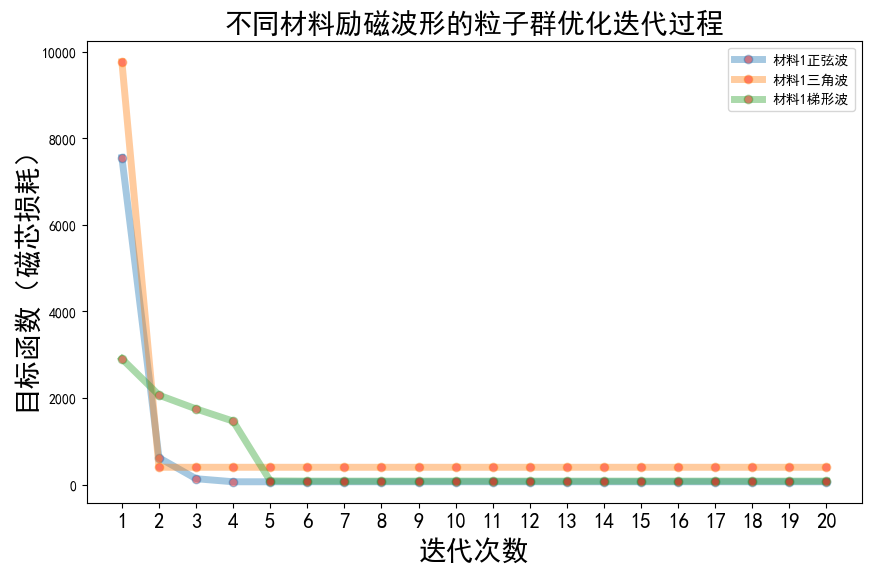

Iteration 1/20, Best Position: [3.39532276e+05 2.75678219e-02 7.25711354e+01], Best Score: 26563.279796239996
Iteration 2/20, Best Position: [2.89862373e+05 9.63815000e-03 9.00000000e+01], Best Score: 1707.1427572382588
Iteration 3/20, Best Position: [2.14512937e+05 9.63815000e-03 9.00000000e+01], Best Score: 1074.4329521629272
Iteration 4/20, Best Position: [6.99353556e+04 9.63815000e-03 9.00000000e+01], Best Score: 194.57883722100098
Iteration 5/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 117.04791986437097
Iteration 6/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 117.04791986437097
Iteration 7/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 117.04791986437097
Iteration 8/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 117.04791986437097
Iteration 9/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 117.04791986437097
Iteration 10/20, Best Position: [4.99900e+04 9.63815e-0

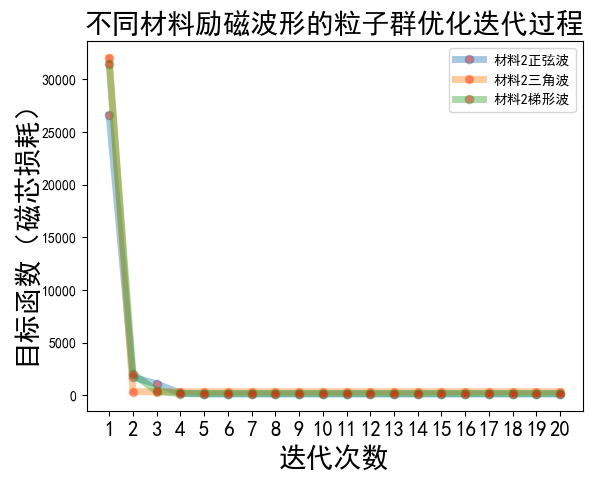

Iteration 1/20, Best Position: [9.99500603e+04 1.64782404e-02 5.02848447e+01], Best Score: 1641.0312737987306
Iteration 2/20, Best Position: [4.99900000e+04 9.63815000e-03 5.05232145e+01], Best Score: 167.49781768652616
Iteration 3/20, Best Position: [4.99900000e+04 9.63815000e-03 5.75616701e+01], Best Score: 161.0157247146275
Iteration 4/20, Best Position: [4.99900000e+04 9.63815000e-03 6.53834262e+01], Best Score: 155.12240466080434
Iteration 5/20, Best Position: [4.99900000e+04 9.63815000e-03 7.72552021e+01], Best Score: 147.99201132994267
Iteration 6/20, Best Position: [4.99900000e+04 9.63815000e-03 8.78621181e+01], Best Score: 142.9017948429516
Iteration 7/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 141.98698390194633
Iteration 8/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 141.98698390194633
Iteration 9/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 141.98698390194633
Iteration 10/20, Best Position: [4.9990

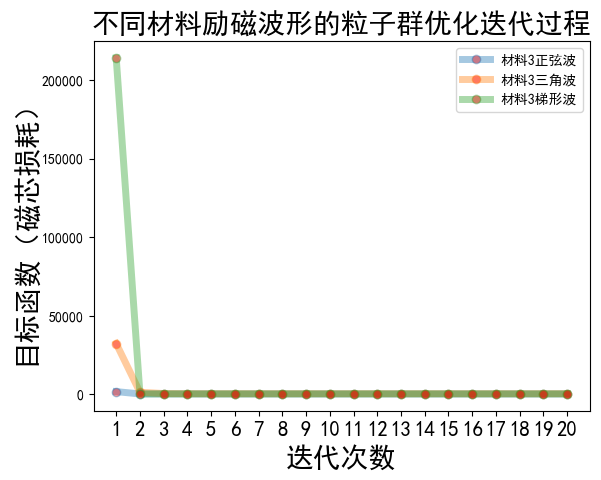

Iteration 1/20, Best Position: [2.86137213e+05 6.72027979e-02 8.98650200e+01], Best Score: 171393.96347534744
Iteration 2/20, Best Position: [2.86137571e+05 9.63815000e-03 9.00000000e+01], Best Score: 1535.96126569723
Iteration 3/20, Best Position: [1.76682648e+05 9.63815000e-03 9.00000000e+01], Best Score: 720.4708674561555
Iteration 4/20, Best Position: [7.50157881e+04 9.63815000e-03 9.00000000e+01], Best Score: 191.0502905049031
Iteration 5/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 102.51060474078237
Iteration 6/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 102.51060474078237
Iteration 7/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 102.51060474078237
Iteration 8/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 102.51060474078237
Iteration 9/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 102.51060474078237
Iteration 10/20, Best Position: [4.99900e+04 9.63815e-03 9.

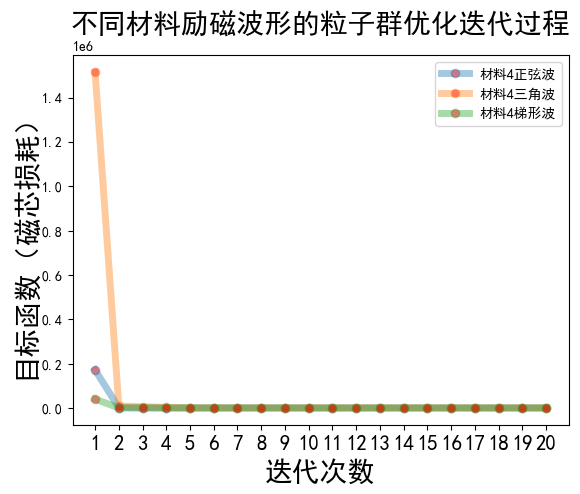

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import warnings
import seaborn as sns
from scipy.stats import pearsonr
# 忽略所有的警告
warnings.filterwarnings("ignore")

# 设置字体为 SimHei（黑体）以支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号


# 定义目标函数 
def objective_function(x):
    return a*steinmetz_eq_adjust(x) + b*separate(x)

# 粒子类
class Particle:
    def __init__(self, dimensions, bounds):
        self.position = np.random.uniform(bounds[:, 0], bounds[:, 1], dimensions)  # 粒子的位置
        self.velocity = np.random.uniform(-1, 1, dimensions)                      # 粒子的速度
        self.best_position = np.copy(self.position)                               # 粒子经历的最佳位置
        self.best_score = float('inf')                                            # 粒子经历的最佳得分
        self.bounds = bounds                                                     # 搜索空间边界

    # 更新位置并确保其在边界范围内
    def update_position(self):
        self.position = np.clip(self.position, self.bounds[:, 0], self.bounds[:, 1])

# 粒子群算法类
class PSO:
    def __init__(self, objective_function, dimensions, bounds, n_particles=30, max_iter=100, w=0.5, c1=1.5, c2=2.0):
        self.objective_function = objective_function  # 目标函数
        self.dimensions = dimensions                  # 搜索空间的维度
        self.bounds = bounds                          # 搜索空间的边界 (约束)
        self.n_particles = n_particles                # 粒子的数量
        self.max_iter = max_iter                      # 最大迭代次数
        self.w = w                                    # 惯性权重
        self.c1 = c1                                  # 个体学习因子
        self.c2 = c2                                  # 社会学习因子
        self.particles = [Particle(dimensions, bounds) for _ in range(n_particles)]  # 初始化粒子群
        self.global_best_position = np.zeros(dimensions)  # 全局最佳位置
        self.global_best_score = float('inf')             # 全局最佳得分

    # 优化过程
    def optimize(self):
        ls = []
        for t in range(self.max_iter):
            for particle in self.particles:
                # 计算当前粒子的目标函数值
                fitness = self.objective_function(particle.position)
                
                # 更新粒子的个体最佳位置和得分
                if fitness < particle.best_score:
                    particle.best_score = fitness
                    particle.best_position = np.copy(particle.position)

                # 更新全局最佳位置和得分
                if fitness < self.global_best_score:
                    self.global_best_score = fitness
                    self.global_best_position = np.copy(particle.position)

            # 更新粒子的速度和位置
            for particle in self.particles:
                r1 = np.random.random(self.dimensions)
                r2 = np.random.random(self.dimensions)

                # 速度更新公式
                particle.velocity = (self.w * particle.velocity +
                                    self.c1 * r1 * (particle.best_position - particle.position) +
                                    self.c2 * r2 * (self.global_best_position - particle.position))

                # 位置更新
                particle.position += particle.velocity
                particle.update_position()  # 更新后确保粒子位置在约束范围内

            # 输出当前迭代的全局最优解
            print(f"Iteration {t+1}/{self.max_iter}, Best Position: {self.global_best_position}, Best Score: {self.global_best_score}")
            ls.append(self.global_best_score)

        return self.global_best_position, self.global_best_score,pd.Series(ls)


# 定义问题的维度
dimensions = 3
# 定义每个维度的搜索空间边界（例如 [-5, 5]）
bounds = np.array([[49990, 501180], [0.00963815,0.313284469], [25, 90]])


ls = []
score = []
mat = []
bo = []

plt.figure(figsize=(10, 6))

for i in df['材料'].unique():
    for o in df['励磁波形'].unique():
        a1,a2,a3,a4,b1,b2,b3,b4,a,b = df[(df.材料==i)&(df.励磁波形==o)][['a1', 'a2', 'a3', 'a4', 'b1', 'b2', 'b3', 'b4','a','b']].values[0]
        pso = PSO(objective_function, dimensions, bounds, n_particles=5, max_iter=20)
        best_position, best_score,values = pso.optimize()
        
        values.plot(linestyle='-',marker='o',markerfacecolor='r',alpha=0.4,linewidth=5,label=f'{i}{o}')
        
        ls.append(best_position)
        score.append(best_score)
        mat.append(i)
        bo.append(o)
        
        
    plt.title('不同材料励磁波形的粒子群优化迭代过程',fontsize=20)
    plt.xlabel('迭代次数',fontsize=20)
    plt.ylabel('目标函数（磁芯损耗）',fontsize=20)
    plt.legend()
    plt.xticks(list(range(20)),list(range(1,21)),rotation=0,fontsize=15)
    #plt.savefig(f'问题5\\{i}励磁波形的粒子群优化迭代过程.png',dpi=500)
    plt.show()
result = pd.DataFrame(ls,columns=['f_opt','Bm_opt','temp_opt'])
result['材料'] = mat
result['励磁波形'] = bo
result['最优磁芯损耗'] = score
result.to_excel('最优磁芯损耗.xlsx',index=False)